# ML analysis of Free Energy of Condensation data

This notebook contains analysis using randomly generated simulations which output the free energy of condensation.

The input and output data is stored in a single table. First we need to separate the data into `X`, an array containing the input data, and `y`, a vector containing the corresponding results. This is done in the preprocessing script.

The input parameters are as follows:

| Parameter | Range | N |
| :-: | :-: | :-:
| $\kappa$ | (2, 8) | 7 |
| $\lambda$ | (5, 25) | 21 |
| $k_1$ | 0 \| 1 \| 5 \| 10 \| 100 | 5 |
| $k_2$ | 0 \| 1 \| 5 \| 10 \| 100 | 5 |
| $K$ | 5 \| 10 \| 20 \| 50 | 4 |
| $\theta _0$ | 90 \| 120 \| 135 \| 180 | 4 |
| charge ratio | (0, 1, 0.1) | 10 |
| charge max | (0, 4) | 5 |
| charge position | 'core' \| 'tail' | 2 |

In total there are: $7 \times 21 \times 5 \times 5 \times 4 \times 4 \times 10 \times 5 \times 2 = 5.88\times10^{6}$ different combinations of parameters. We aim to use 100 values which is significantly less than this to make a meaningful model to predict the value for the free energy of condensation.

In [9]:
from preprocess import import_data
from model import build_model
import analysis

# Note that the data is normalised by the distance from the mean divided by the standard deviation
# So if x = 1.0, it means that x is +1std away from the mean for that category
X_train, y_train, X_test, y_test = import_data('./results_large.csv')
model, hist = analysis.fit(X_train, y_train, epochs=5000)



            K  charge_max  tail  charge_ratio        k1        k2       kap  \
398 -0.738818    1.250031     0     -0.713064 -0.429464 -0.618949 -0.055188   
125 -0.738818    1.250031     1     -0.713064  2.180635 -0.710975  0.464228   
328 -0.738818   -1.464969     0      0.930888 -0.566838  1.566676  0.464228   
339  1.442697   -0.559969     0      1.259678 -0.292091 -0.503916 -1.094020   
172 -1.011507   -1.464969     1     -1.041854 -0.429464  1.566676  0.464228   
..        ...         ...   ...           ...       ...       ...       ...   
183  1.442697   -0.559969     0     -0.713064 -0.539363 -0.618949 -0.055188   
151 -0.738818   -0.559969     0     -1.041854 -0.566838 -0.503916 -1.094020   
363 -1.011507    0.345031     1     -0.055483 -0.292091  1.566676 -0.574604   
302 -1.011507   -0.559969     0     -0.055483 -0.539363  1.566676 -1.094020   
190  1.442697    0.345031     1     -0.055483 -0.566838 -0.733982  0.464228   

          lam    theta0  
398 -0.559676  0.068926  

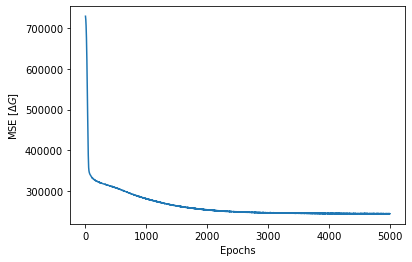

In [10]:
# plot the mean-sq error in absolute units
analysis.plot(hist, metric='mse')

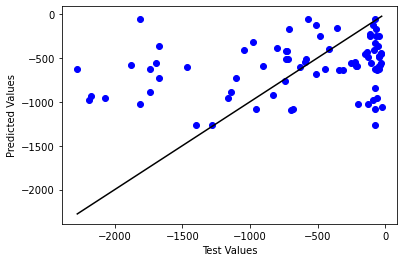

In [11]:
# plot the correlation between the predictions and the test data
y_pred = analysis.predict(X_test, y_test, model, plot=True)

## Conclusion

The second graph shows some correlation between tested and predicted values. At the moment, the results are somewhat promising but not accurate enough to be meaningful. I think this reason is that the range of combinations is too high, or that there is not enough data. Soon I will have run ~5000 simulations rather than 100, and so hopefully the model will have more data to learn from.

1      -732.855503
3      -310.066887
7      -830.083294
15     -202.797051
22     -514.141411
          ...     
373     -75.943668
386     -29.709286
388   -1814.582680
393    -214.341593
396    -714.501635
Name: dg, Length: 80, dtype: float64